# Exercise 1: MMD CLASSIFIER

## 1. The following code was used to complete Exercise 1, Part 1

In [50]:
import numpy as np
np.random.seed(0)

n = 5
mu_noise = np.array([2, 2])
cov_noise = np.array([[2, 0], [0, 3]])

mu_1 = np.array([1, 3])
cov_1 = np.array([[1, 0], [0, 15]])
c_1 = np.random.multivariate_normal(mu_1, cov_1, n)
noise_1 = np.random.multivariate_normal(mu_noise, cov_noise, n)
c_1 = c_1 + noise_1
print(f"Class 1 is {c_1}")

mu_2 = np.array([20, 31])
cov_2 = np.array([[3, 4], [4, 11]])
c_2 = np.random.multivariate_normal(mu_2, cov_2, n)
noise_2 = np.random.multivariate_normal(mu_noise, cov_noise, n)
c_2 = c_2 + noise_2
print(f"Class 2 is {c_2}")

mu_1_5 = np.mean(c_1, axis=0)
mu_2_5 = np.mean(c_2, axis=0)

S1_inv_5 = np.linalg.inv(np.cov(c_1.T))
S2_inv_5 = np.linalg.inv(np.cov(c_2.T))

Class 1 is [[ 5.45681053 12.08163614]
 [ 5.41296766 10.10879192]
 [ 2.49460888 13.00181466]
 [ 2.55850519 11.26749748]
 [ 2.20272472  5.14248427]]
Class 2 is [[25.31073326 41.94952444]
 [18.81649456 28.2918927 ]
 [20.68816933 24.29206135]
 [23.83854579 34.89750766]
 [17.91239753 27.94280608]]


## 3. The following code was used to complete Exercise 1, Part 3

C:\Users\Calvin Tran\AppData\Local\Temp\ipykernel_8516\1585379326.py:9: RuntimeWarning: invalid value encountered in sqrt
  y1 = (-(0.13028*x-3.032)+np.sqrt(0.0059183104*(x**2)-1.64406952*x+15.8257648))/0.09076
C:\Users\Calvin Tran\AppData\Local\Temp\ipykernel_8516\1585379326.py:10: RuntimeWarning: invalid value encountered in sqrt
  y2 = (-(0.13028*x-3.032)-np.sqrt(0.0059183104*(x**2)-1.64406952*x+15.8257648))/0.09076


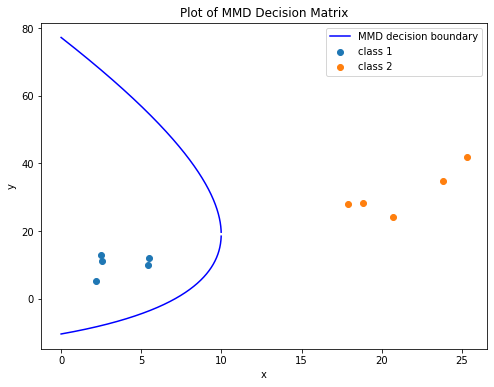

In [41]:
import matplotlib.pyplot as plt
# Create an array of x values
x = np.linspace(0, 20, 10000)  # Adjust the range as needed

S1_inv = np.linalg.inv(np.cov(c_1.T))
S2_inv = np.linalg.inv(np.cov(c_2.T))

# Calculate the corresponding y values
y1 = (-(0.13028*x-3.032)+np.sqrt(0.0059183104*(x**2)-1.64406952*x+15.8257648))/0.09076
y2 = (-(0.13028*x-3.032)-np.sqrt(0.0059183104*(x**2)-1.64406952*x+15.8257648))/0.09076

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y1, c='b', label="MMD decision boundary")
plt.plot(x, y2, c='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of MMD Decision Matrix')
plt.scatter(c_1[:,0], c_1[:,1], label="class 1")
plt.scatter(c_2[:,0], c_2[:,1], label="class 2")
plt.legend()
plt.show()


## 4. The following is code used to complete Exercise 1, Part 4

We have S1_inv as [[ 0.33122331 -0.00844281]
 [-0.00844281  0.05203945]] and S2_inv as [[ 0.240814   -0.06104875]
 [-0.06104875  0.08087315]]


C:\Users\Calvin Tran\AppData\Local\Temp\ipykernel_8516\4176860665.py:61: UserWarning: The following kwargs were not used by contour: 'label'
  contour = plt.contour(X, Y, Z, levels=[0], label='MMD decision boundary')


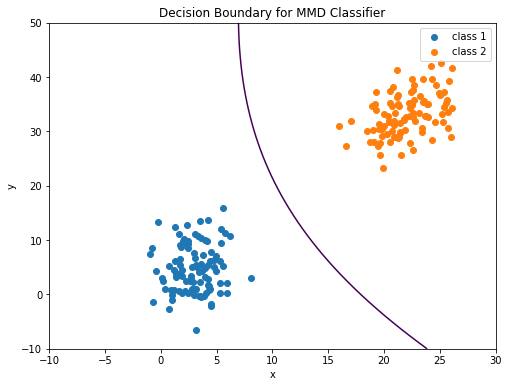

In [42]:
import numpy as np
np.random.seed(0)

# Create noise specs
n = 100
mu_noise = np.array([2, 2])
cov_noise = np.array([[2, 0], [0, 3]])

# Create class 1
mu_1 = np.array([1, 3])
cov_1 = np.array([[1, 0], [0, 15]])
c_1 = np.random.multivariate_normal(mu_1, cov_1, n)
noise_1 = np.random.multivariate_normal(mu_noise, cov_noise, n)
c_1 = c_1 + noise_1

# Create class 2
mu_2 = np.array([20, 31])
cov_2 = np.array([[3, 4], [4, 11]])
c_2 = np.random.multivariate_normal(mu_2, cov_2, n)
noise_2 = np.random.multivariate_normal(mu_noise, cov_noise, n)
c_2 = c_2 + noise_2

# Determine the covariance matrices of each class's sample
cov_1_100 = np.cov(c_1.T)
cov_2_100 = np.cov(c_2.T)

# Determine inverse covariance matrices of each class's sample
S1_inv_100 = np.linalg.inv(cov_1_100)
S2_inv_100 = np.linalg.inv(cov_2_100)
print(f"We have S1_inv as {S1_inv_100} and S2_inv as {S2_inv_100}")

# Find average of each class's sample
mu_1_100 = np.mean(c_1, axis=0)
mu_2_100 = np.mean(c_2, axis=0)

# Create points in XY coordinate space
x = np.linspace(-10, 30)
y = np.linspace(-10, 50)
X, Y = np.meshgrid(x, y)

# Create a function to determine decision boundary given a point in XY coordinate space and the training points
def MMD(x,y, c_1_mean, c_2_mean, c_1_cov_inv, c_2_cov_inv):
    curr = np.array([x,y])

    dist_1 = curr - c_1_mean
    dist_2 = curr - c_2_mean

    mahal_dist_1 = dist_1 @ c_1_cov_inv @ dist_1
    mahal_dist_2 = dist_2 @ c_2_cov_inv @ dist_2
    
    return mahal_dist_1-mahal_dist_2

# Apply function to all points in meshgrid
Z = np.zeros_like(X)
for row in range(X.shape[0]):
    for col in range(Y.shape[0]):
        Z[row,col] = MMD(X[row,col], Y[row,col], mu_1_100, mu_2_100, S1_inv_100, S2_inv_100)
    
# Plot
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=[0], label='MMD decision boundary')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(c_1[:, 0], c_1[:, 1], label='class 1')
plt.scatter(c_2[:, 0], c_2[:, 1], label='class 2')
plt.xlim([-10,30])
plt.ylim([-10,50])
plt.title('Decision Boundary for MMD Classifier')
plt.legend()
plt.show()


## 5. The following code was used to complete Exercise 1, Part 5

The accuracy of the 100 sample MMD is 100%


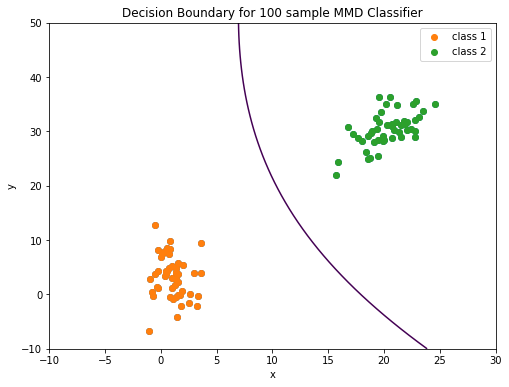

The accuracy of the 5 sample MMD is 100%


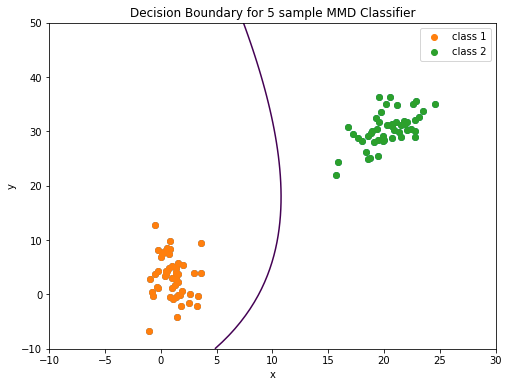

In [43]:
n = 50

mu_noise_new = np.array([0,0])
cov_noise_new = np.array([[1,0],[0,1]])

c_1_new = np.random.multivariate_normal(mu_1, cov_1, n)
noise_1_new = np.random.multivariate_normal(mu_noise_new, cov_noise_new, n)
c_1_new = c_1_new + noise_1_new

c_2_new = np.random.multivariate_normal(mu_2, cov_2, n)
noise_2_new = np.random.multivariate_normal(mu_noise_new, cov_noise_new, n)
c_2_new = c_2_new + noise_2_new

test = np.concatenate((c_1_new,c_2_new), axis=0)

# We first test on the MMD trained on 100 samples:

res100 = []
acc100 = 0
for point in test:
    val = MMD(point[0], point[1], mu_1_100, mu_2_100, S1_inv_100, S2_inv_100)
    if val < 0:
        res100.append(1)
    else:
        res100.append(2)
for i in range(0,50):
    if res100[i] == 1:
        acc100 += 1
for i in range(50,len(res100)):
    if res100[i] == 2:
        acc100 += 1
print(f"The accuracy of the 100 sample MMD is {acc100}%")

res100 = np.array(res100)
plt.figure(figsize=(8, 6))
plt.scatter(test[:,0],test[:,1])
plt.scatter(test[res100==1,0], test[res100==1,1], label='class 1')
plt.scatter(test[res100==2,0], test[res100==2,1], label='class 2')

x = np.linspace(-10, 30)
y = np.linspace(-10, 50)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for row in range(X.shape[0]):
    for col in range(Y.shape[0]):
        Z[row,col] = MMD(X[row,col], Y[row,col], mu_1_100, mu_2_100, S1_inv_100, S2_inv_100)
contour = plt.contour(X, Y, Z, levels=[0])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary for 100 sample MMD Classifier')
plt.xlim(-10, 30)
plt.ylim(-10, 50)

plt.legend()
plt.show()

# We then test on the 5 sample MMD:

res5 = []
acc5 = 0
for point in test:
    val = MMD(point[0], point[1], mu_1_5, mu_2_5, S1_inv_5, S2_inv_5)
    if val < 0:
        res5.append(1)
    else:
        res5.append(2)
for i in range(0,50):
    if res5[i] == 1:
        acc5 += 1
for i in range(50,len(res5)):
    if res5[i] == 2:
        acc5 += 1
print(f"The accuracy of the 5 sample MMD is {acc5}%")

res5 = np.array(res5)
plt.figure(figsize=(8, 6))
plt.scatter(test[:,0],test[:,1])
plt.scatter(test[res5==1,0], test[res5==1,1], label='class 1')
plt.scatter(test[res5==2,0], test[res5==2,1], label='class 2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary for 5 sample MMD Classifier')

S1_inv_5 = np.array([[0.3999, -0.06476], [-0.06476, 0.1156]])
S2_inv_5 = np.array([[0.3990, -0.1299], [-0.1299, 0.07022]])

x = np.linspace(-10, 30)
y = np.linspace(-10, 50)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for row in range(X.shape[0]):
    for col in range(Y.shape[0]):
        Z[row,col] = MMD(X[row,col], Y[row,col], mu_1_5, mu_2_5, S1_inv_5, S2_inv_5)
contour = plt.contour(X, Y, Z, levels=[0])

plt.xlim(-10, 30)
plt.ylim(-10, 50)
plt.legend()
plt.show()

## The following code was used to complete Exercise 1, Part 7

The equation representing the decision boundary is x_2 = -0.67x_1 + 27.35
The accuracy of the 100 sample MED is 100%


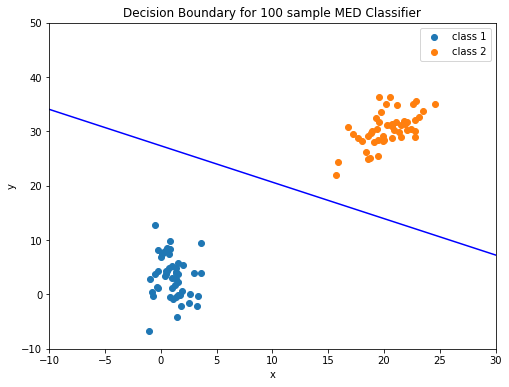

In [44]:
# Calculate decision boundary
diff = mu_1_100-mu_2_100
m = -diff[0]/diff[1]
b = 0.5*(np.matmul(np.transpose(mu_1_100), mu_1_100)-np.matmul(np.transpose(mu_2_100), mu_2_100))/diff[1]
print(f"The equation representing the decision boundary is x_2 = {m:.2f}x_1 + {b:.2f}")

resMED = []
accMED = 0
for point in test:
    if point[1] < -0.67*point[0]+27.35:
        resMED.append(1)
    else:
        resMED.append(2)

for i in range(0,50):
    if resMED[i] == 1:
        accMED += 1
for i in range(50,len(resMED)):
    if resMED[i] == 2:
        accMED += 1
print(f"The accuracy of the 100 sample MED is {accMED}%")

resMED = np.array(resMED)

# Plot MED decision boudnary
x_1 = np.linspace(-10, 30, 100)
x_2 = -0.67*x_1+27.35
plt.figure(figsize=(8, 6))
plt.plot(x_1, x_2, 'b-')

# Plot points according to class
plt.scatter(test[resMED==1,0], test[resMED==1,1], label='class 1')
plt.scatter(test[resMED==2,0], test[resMED==2,1], label='class 2')

plt.title('Decision Boundary for 100 sample MED Classifier')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-10, 30)
plt.ylim(-10, 50)
plt.legend()
plt.show()

# Exercise 2

## 1. The following code was used to complete Exercise 2, Part 1.

The accuracy of the 100 sample ML classifier is 100%


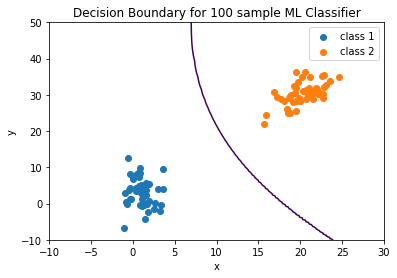

In [45]:
# We have the sample mean and covariances stored as mu_1_100, mu_2_100, cov_1_100 and cov_2_100
def PDF_1(x1, x2):
    x = np.array([x1, x2])
    num = np.exp(-0.5*((x-mu_1_100) @ S1_inv_100 @ (x-mu_1_100)))
    denom = 2*np.pi*np.linalg.det(cov_1_100)**0.5
    return num/denom

def PDF_2(x1, x2):
    x = np.array([x1, x2])
    num = np.exp(-0.5*((x-mu_2_100) @ S2_inv_100 @ (x-mu_2_100)))
    denom = 2*np.pi*np.linalg.det(cov_2_100)**0.5
    return num/denom

def ML_classify(x1, x2):
    prob_1 = PDF_1(x1, x2)
    prob_2 = PDF_2(x1, x2)
    # If prob_1 > prob_2, point belongs to class 1
    return prob_1 - prob_2

resML = []
accML = 0

for point in test:
    res = ML_classify(point[0], point[1])
    if res > 0:
        resML.append(1)
    else:
        resML.append(2)
for i in range(0,50):
    if resML[i] == 1:
        accML += 1
for i in range(50,len(resML)):
    if resML[i] == 2:
        accML += 1

resML = np.array(resML)
print(f"The accuracy of the 100 sample ML classifier is {accML}%")

plt.scatter(test[resML==1,0], test[resML==1,1], label='class 1')
plt.scatter(test[resML==2,0], test[resML==2,1], label='class 2')
x = np.linspace(-10, 30, 100)
y = np.linspace(-10, 50, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for row in range(X.shape[0]):
    for col in range(Y.shape[0]):
        Z[row,col] = ML_classify(X[row,col], Y[row,col])
contour = plt.contour(X, Y, Z, levels=[0])

plt.title('Decision Boundary for 100 sample ML Classifier')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-10, 30)
plt.ylim(-10, 50)
plt.legend()
plt.show()


## The following code was used to complete Exercise 2, Part 2

The accuracy of the 100 sample MAP classifier is 100%


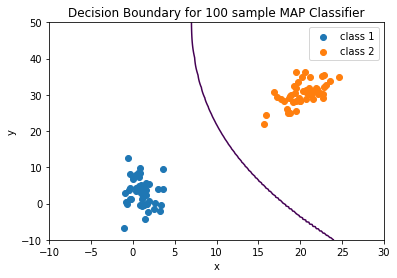

In [46]:
def MAP_classify(x1, x2):
    map_1 = 0.58*PDF_1(x1, x2)
    map_2 = 0.42*PDF_2(x1, x2)
    # If prob_1 > prob_2, point belongs to class 1
    return map_1 - map_2

resMAP = []
accMAP = 0

for point in test:
    res = MAP_classify(point[0], point[1])
    if res > 0:
        resMAP.append(1)
    else:
        resMAP.append(2)
for i in range(0,50):
    if resMAP[i] == 1:
        accMAP += 1
for i in range(50,len(resML)):
    if resMAP[i] == 2:
        accMAP += 1

resMAP = np.array(resMAP)
print(f"The accuracy of the 100 sample MAP classifier is {accMAP}%")

plt.scatter(test[resMAP==1,0], test[resMAP==1,1], label='class 1')
plt.scatter(test[resMAP==2,0], test[resMAP==2,1], label='class 2')
x = np.linspace(-10, 30, 100)
y = np.linspace(-10, 50, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for row in range(X.shape[0]):
    for col in range(Y.shape[0]):
        Z[row,col] = MAP_classify(X[row,col], Y[row,col])
contour = plt.contour(X, Y, Z, levels = [0])

plt.title('Decision Boundary for 100 sample MAP Classifier')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-10, 30)
plt.ylim(-10, 50)
plt.legend()
plt.show()


# Exercise 3

## The following code was used to complete Exercise 3, Part 4

In [98]:
# Create exponential distribution classifier
lambd1 = 1/np.mean(train1)
lambd2 = 1/np.mean(train2)

def exp_classify(x):
    c1 = lambd1 * np.exp(-1*lambd1*x)
    c2 = lambd2 * np.exp(-1*lambd2*x)

    # If positive, x belongs to c1. Otherwise, x belongs to c2
    return c1-c2

# Create uniform distribution classifier
a1 = min(train1)
a2 = min(train2)
b1 = max(train1)
b2 = max(train2)

def uni_classify(x):
    c1 = 1 / (b1 - a1) if a1 <= x <= b1 else 0
    c2 = 1 / (b2 - a2) if a2 <= x <= b2 else 0

    # If positive, x belongs to c1. Otherwise, x belongs to c2
    return c1 - c2

# Create Gaussian-exponential distribution classifier
theta1_1 = np.mean(train1)
theta2_1 = np.var(train1)
theta3_1 = 1/np.mean(train1)

theta1_2 = np.mean(train2)
theta2_2 = np.var(train2)
theta3_2 = 1/np.mean(train2)

def gauss_exp_classify(x):
    gauss1 = (1/(np.sqrt(2*np.pi*theta2_1))) * np.exp(-0.5*(x-theta1_1)**2/theta2_1)
    exp1 = theta3_1 * np.exp(-1*theta3_1*x)
    c1 = 0.5 * gauss1 * exp1

    gauss2 = (1/(np.sqrt(2*np.pi*theta2_2))) * np.exp(-0.5*(x-theta1_2)**2/theta2_2)
    exp2 = theta3_2 * np.exp(-1*theta3_2*x)
    c2 = 0.5 * gauss2 * exp2

    # If positive, x belongs to c1. Otherwise, x belongs to c2
    return c1-c2

res_exp = []
res_uni = []
res_gaussexp = []

acc_exp = 0
acc_uni = 0
acc_gaussexp = 0

for i in range(100):
    # Create training data
    train1 = np.random.normal(0.5, 1, 5)
    train2 = np.random.normal(5, 3, 5)

    # Create noisy test data
    test1 = np.random.normal(0.5, 1, 50) + np.random.normal(0, 1, 50)
    test2 = np.random.normal(5, 3, 50) + np.random.normal(0, 1, 50)
    test_all = np.concatenate((test1, test2), axis=0)
    for point in test_all:
        res_exp.append(1 if exp_classify(point) > 0 else 2)
        res_uni.append(1 if uni_classify(point) > 0 else 2)
        res_gaussexp.append(1 if gauss_exp_classify(point) > 0 else 2)

    for i in range(0,50):
        if res_exp[i] == 1:
            acc_exp += 1
        if res_uni[i] == 1:
            acc_uni += 1
        if res_gaussexp[i] == 1:
            acc_gaussexp += 1
    for i in range(50,len(resML)):
        if res_exp[i] == 2:
            acc_exp += 1
        if res_uni[i] == 2:
            acc_uni += 1
        if res_gaussexp[i] == 2:
            acc_gaussexp += 1

print(f"The accuracy of the exponential classifier is {acc_exp/100}%. The accuracy of the uniform classifier is {acc_uni/100}%. The accuracy of the Gaussian-exponential classifier is {acc_gaussexp/100}%.")

The accuracy of the exponential classifier is 77.0%. The accuracy of the uniform classifier is 76.0%. The accuracy of the Gaussian-exponential classifier is 83.0%.
